# **Homework Assignment #2 Solution**

Assigned: February 1, 2021

Due: February 19, 2021



---

This assignment consists of questions that require a short answer and one Python programming task. You can enter your answers and your code directly in a Colaboratory notebook and upload the **shareable** link for your notebook as your homework submission.


---

#1.

(10 points) Consider training set accuracy and test set accuracy curves
plotted below as a function of the number of nodes in a decision tree.
While this graph plots accuracy, we can also compute error as 1.0 - accuracy.

![alt text](https://drive.google.com/uc?id=1ScPyMBFemm6dbgu1saUqSV3dJdUlwIdd)

Can you suggest a way to determine the amount of overfit in the learned model
based on these curves? Explain / justify your answer.

---

Answer: Training accuracy minus test accuracy provides an estimate of the
amount of overfitting.

---

Based on the curve in the graph, what size decision tree would you choose to use and why?

---

Answer: Size 10 because this tree has the highest accuracy on test data.

---

#2.

(10 points) To demonstrate your understanding of k-nearest neighbors, construct a labeled dataset where the dimensionality is 1 and the leave-one-out cross-validation accuracy for 1-nearest neighbor is always 0. As a reminder, leave-one-out uses all of the training data except one instance for learning the model and uses the held-out instance for testing, repeating the process for each possible holdout point and averaging the results. Therefore, this describes a situation where the classifier always gets the prediction wrong. 

---

Answer: Plot points on real number line with labels that alternate between
$+$ and $-$. In leave-one-out cross validation we compute the predicted class for
each point given all the remaining points. Because the neighbors of every point
are in the opposite class, leave-one-out cross validation predictions will
never be correct.

---

#3.

(20 points) Consider training a perceptron using the datapoints in the table below, presented in this order.

Instance | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8
--- | --- | --- | --- | --- | --- | --- | --- | ---
Label $y$ | +1 | -1 | +1 | -1 | +1 | -1 | +1 | +1
Data $(x_1,x_2)$ | 10, 10 | 0, 0 | 8, 4 | 3, 3 | 4, 8 | 0.5, 0.5 | 4, 3 | 2, 5

Given an initial set of weights $w = (1, 1)$ and bias $b=0$, show each step of the perceptron algorithm for the above sequence of instances over one epoch. This includes computation of the activation and adjustment of the weights after each instance. 

What is the accuracy of the perceptron after this first epoch?

Will this perceptron eventually converge on a model with zero error for the training data? Why or why not?

---

Answer:

$x_1$ | $x_2$ | $y$ | $w_1$ | $w_2$ | $b$ | $a$ | $ya$
--- | --- | --- | --- | --- | --- | --- | ---
10 | 10 | 1 | 1 | 1 | 0 | 20 | 20 ($>0$)
0 | 0 | -1 | 1 | 1 | 0 | 0 | 0 ($<=0$, need to adjust)
8 | 4 | 1 | 1 | 1 | -1 | 11 | 11 ($>0$)
3 | 3 | -1 | 1 | 1 | -1 | 5 | -5 ($<=0$, need to adjust)
4 | 8 | 1 | -2 | -2 | -2 | -26 | -26 ($<=0$, need to adjust)
0.5 | 0.5 | -1 | 2 | 6 | -1 | 3 | -3 ($<=0$, need to adjust)
4 | 3 | 1 | 1.5 | 5.5 | -2 | 20.5 | 20.5 ($>0$)
2 | 5 | 1 | 1.5 | 5.5 | -2 | 28.5 | 28.5 ($>0$)

The accuracy is 0.5 (50%).

As the graph shows (+1 examples in red, -1 examples in blue), the data is linearly separable. Thus, the perceptron should eventually converge.

![alt text](https://drive.google.com/uc?id=1pRZx9iBo1G-DKOhNtbc_YuQ0sxMVV1ds)

---



---

#4.

(80 points) In this programming task you will gain familiarity with k-nearest neighbor classification, the sklearn machine learning library, and working with a handwriting recognition dataset.

For this program, compare the accuracy of four classifiers for correctly classifying the hand-written number from the digits dataset available as a sklearn library (see https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html for details). The classifiers are:

- Decision tree (you can use the sklearn library for this)
- K nearest neighbors with 5 neighbors (you can use the sklearn library for this)
- Majority classifier (you can use the sklearn library for this)
- Your own implementation of a KNN classifier (do not use the sklearn library for this). This classifier should compute Euclidean distance between pairs of points and take the number of neighbors to consider as a parameter.

To report performance, randomly select 2/3 of the data points to use for training and 1/3 to use for testing. Repeat 3 times and report accuracy results averaged over the 3 trials. Compare accuracy results for the classifiers. For your KNN implementation, try different values for $k$ including 1, 3, 5, 7, and 9. Argue which value of $k$ you would choose and why.

<Figure size 432x288 with 0 Axes>

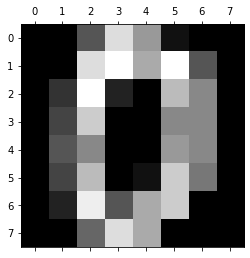

classifier Majority
0.08585858585858586
classifier DT
0.8540965207631874
classifier 5NN
0.978675645342312
Our KNN Classifier (k=1)
0.9831649831649831


In [ ]:
# HW2 Problem 4 Solution

import time
import matplotlib.pyplot as plot
import numpy as np
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from math import sqrt



def ComputeAccuracy(ytest, newlabels):
  numright = 0
  n = len(ytest)
  for i in range(n):
    if newlabels[i] == ytest[i]:
      numright += 1
  return float(numright) / float(n)


def euclidean_distance(x, y):
  distance = 0.0
  for i in range(len(x)-1):
    distance += (x[i] - y[i])**2
  return sqrt(distance)


def get_neighbors(train, test, n_neighbors):
  distances = list()
  n = len(train)
  for i in range(n):
    dist = euclidean_distance(train[i], test)
    distances.append((i, dist))
  distances.sort(key=lambda x: x[1])
  neighbors = list()
  for i in range(n_neighbors):
    neighbors.append(distances[i][0])
  return neighbors


def KNN(xtrain, xtest, ytrain, ytest, n_neighbors):
  n_test = len(ytest)
  numright = 0
  for i in range(n_test):
    neighbors = get_neighbors(xtrain, xtest[i], n_neighbors)
    output_values = ytrain[neighbors]
    counts = np.bincount(output_values)
    prediction = np.argmax(counts)
    if prediction == ytest[i]:
      numright += 1
  return float(numright) / float(n_test)


if __name__ == "__main__":
  t0 = time.time()
  digits = load_digits()
  plt.gray()
  plt.matshow(digits.images[0])
  plt.show()

  n = len(digits.images)
  data = digits.images.reshape((n, -1))

  classifiers = [
     (DummyClassifier(strategy='most_frequent'), "Majority"),
     (DecisionTreeClassifier(), "DT"),
     (KNeighborsClassifier(n_neighbors=5), "5NN")
  ]

  for clf, name in classifiers:
    print("classifier", name)
    results = []
    for i in range(3):
      xtrain, xtest, ytrain, ytest = \
        train_test_split(data, digits.target, test_size=0.33, random_state = i)
      clf.fit(xtrain, ytrain)
      newlabels=clf.predict(xtest)
      results.append(ComputeAccuracy(ytest, newlabels))
    print(np.mean(results))

  print("Our KNN Classifier (k=1)")
  results = []
  for i in range(3):
    xtrain, xtest, ytrain, ytest = \
      train_test_split(data, digits.target, test_size=0.33, random_state = i)
    knn_results = KNN(xtrain, xtest, ytrain, ytest, 3)
    results.append(knn_results)
  print(np.mean(results))